## Mandy's Avocado Project

In [1]:
# First all the imports

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.svm import SVR

enc = LabelEncoder()


scaler = StandardScaler()

In [3]:
# Pull in dataset - 14 total columns, one is unnamed 0 from pulling in csv and two the instructions said to drop 

starterdataset = pd.read_csv("avocado.csv")
starterdataset

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [4]:
# Check for missing data
nan_count = starterdataset.isna().sum()

print(nan_count)

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64


In [5]:
# No missing data found
#Dropping the three columns mentioned above
dataset = starterdataset.drop(["Unnamed: 0", "Date", "region"], axis = 1)
dataset.head(5)

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015


 4046 	4225 	4770 	are different PLU codes, type is organic vs regular.
 I feel that the we need to decide what we are going to target to learn so to speak.

 The important thing that we are comparing I believe is the price - so for example do people buy more organic or non organic, small bags or large bags or XLarge?  I think we can drop total bags as we want to use small and large for comparison, also total volume.  At first I thought PLU might not be important but it does look like at cursury glance possibly PLU 4225 is much more popular so let's keep them to compare first.

 Maybe we should compare just the price and PLU first to see if we could drop 4046 and 4770, and let's see whether we need year or not?  

In [6]:
pludataset = dataset.drop(["Total Volume", "Total Bags", "Small Bags","Large Bags", "XLarge Bags", "type", "year"], axis = 1)
pludataset.head(5)

,AveragePrice,4046,4225,4770
0,1.33,1036.74,54454.85,48.16
1,1.35,674.28,44638.81,58.33
2,0.93,794.70,109149.67,130.50
3,1.08,1132.00,71976.41,72.58
4,1.28,941.48,43838.39,75.78


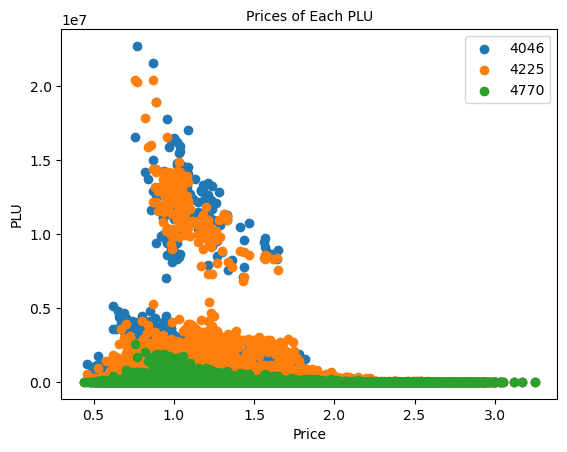

In [7]:
# What does 1e7 mean in the below figure? Question for Nicole

plt.scatter(x=pludataset["AveragePrice"], y = pludataset["4046"])
plt.scatter(x=pludataset["AveragePrice"], y = pludataset["4225"])
plt.scatter(x=pludataset["AveragePrice"], y = pludataset["4770"])
classes = ['4046', '4225', '4770']
plt.legend(labels=classes)
plt.title("Prices of Each PLU", size = 10)
plt.xlabel("Price")
plt.ylabel("PLU")

plt.show()

In [8]:
# and let's get a sum of how many of each PLU also here maybe to see if it's worth comparing all 3 plu's
Total_4046 = pludataset['4046'].sum()
print(Total_4046)
Total_4225 = pludataset['4225'].sum()
print(Total_4225)
Total_4770 = pludataset['4770'].sum()
print(Total_4770)

5347110739.26
5386275717.93
416802342.12999994


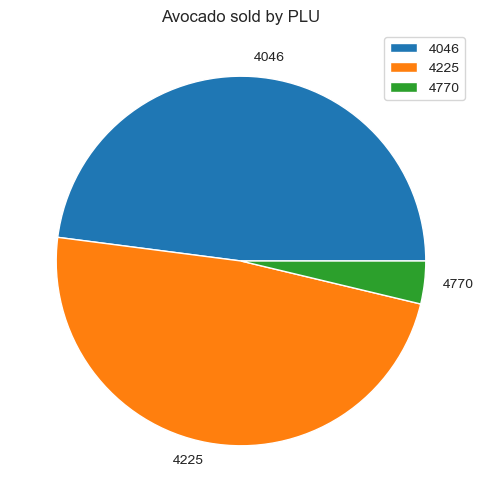

In [9]:
#let's see that in a pie chart to see it in comparison as i'm not sure from this with such large numbers if 4770 is significant
data = [Total_4046, Total_4225, Total_4770] # my data for the chart
labels = ['4046', '4225', '4770'] # Labels for each slice

sns.set_style("whitegrid") # Set style for chart
plt.figure(figsize=(6,6)) # Set figure size
plt.pie(data, labels=labels) # Create pie chart
plt.legend(labels=labels)
plt.title('Avocado sold by PLU')
plt.show() # Show chart

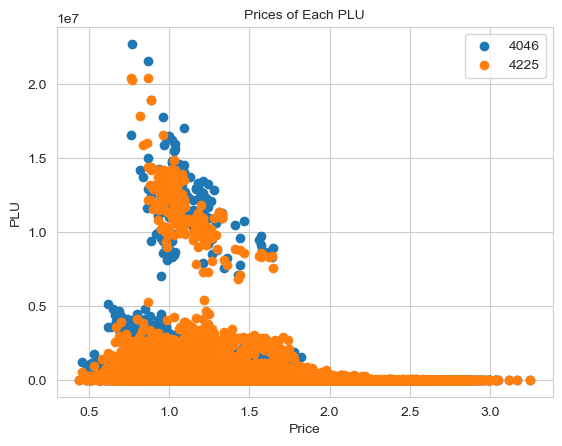

In [10]:
#So considerably less 4770 may not need to use it, we can see the 4225 and 4046 go the same price range if we unlayer for example
plt.scatter(x=pludataset["AveragePrice"], y = pludataset["4046"])
plt.scatter(x=pludataset["AveragePrice"], y = pludataset["4225"])
classes = ['4046', '4225',]
plt.legend(labels=classes)
plt.title("Prices of Each PLU", size = 10)
plt.xlabel("Price")
plt.ylabel("PLU")

plt.show()

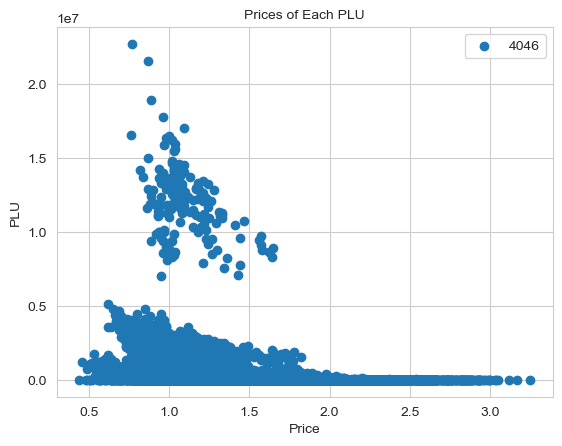

In [11]:
plt.scatter(x=pludataset["AveragePrice"], y = pludataset["4046"])
#plt.scatter(x=pludataset["AveragePrice"], y = pludataset["4225"])
classes = ['4046', ]
plt.legend(labels=classes)
plt.title("Prices of Each PLU", size = 10)
plt.xlabel("Price")
plt.ylabel("PLU")

plt.show()

In [12]:
#but the number sold is so many less so let's not use that plu in the model
#Next let's check if year made a big difference in volume sold, if not we don't need it either


In [13]:
vol_dataset = dataset.drop(["AveragePrice", "Total Bags", "Small Bags","Large Bags", "XLarge Bags", "type", "4046", "4770", "4225"], axis = 1)
vol_dataset.head(5)

,Total Volume,year
0,64236.62,2015
1,54876.98,2015
2,118220.22,2015
3,78992.15,2015
4,51039.60,2015


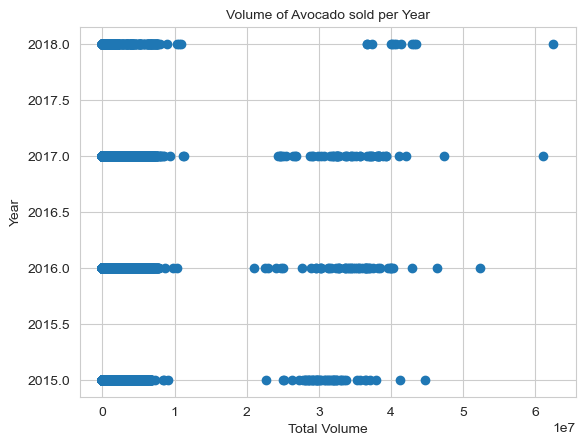

In [14]:
plt.scatter(x=vol_dataset["Total Volume"], y = vol_dataset["year"])
plt.title("Volume of Avocado sold per Year", size = 10)
plt.xlabel("Total Volume")
plt.ylabel("Year")

plt.show()

In [15]:
dataset['year'].unique()

array([2015, 2016, 2017, 2018], dtype=int64)

<class 'pandas.core.series.Series'>


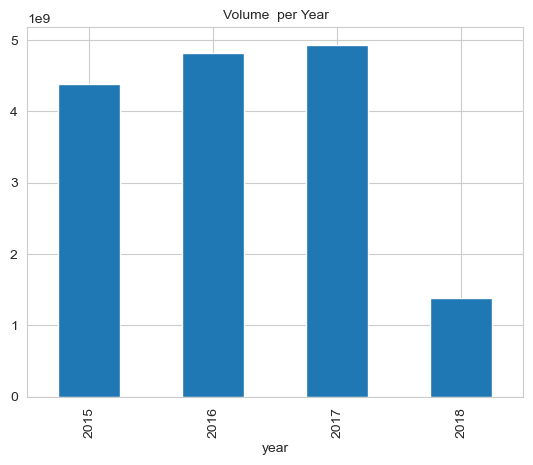

In [16]:
# I think this would look better as a bar graph actually.
df_groups = dataset.groupby(['year'])['Total Volume'].sum()
plt.title("Volume  per Year", size = 10)
#create bar plot by group
df_groups.plot(kind='bar')
print(type(df_groups))

In [17]:
df_groups

year
2015    4.385469e+09
2016    4.820890e+09
2017    4.934306e+09
2018    1.382738e+09
Name: Total Volume, dtype: float64

In [18]:
# This cell is for my reference in the future. Disregard!

#different way of doing bar plot if i first did a count of the values and then listed them for example

#volume = [250000,  500000,  750000,  1000000] 
#vol_dataset = pd.DataFrame({'year':['2015', '2016', '2017', '2018'], 'Total Volume':volume})

#ax = vol_dataset.plot.bar(x='year', y='Total Volume', rot=0)

#df = pd.DataFrame({'lab':['A', 'B', 'C'], 'val':[10, 30, 20]})

In the end I decided to drop 4770 as it was such a small amount compared to the others and had a similar price range as both the others
 So what I thought i'd keep was the price as what we want to see in the final model is what bag sizes are sold most with the best price
 and organic or conventional, and finally whether the price/size of bag bought is different between the two largely purchased plu's

In [19]:

dataset = dataset.drop(["Total Volume", "Total Bags", "4770", "year"], axis = 1)
dataset.head(5)

,AveragePrice,4046,4225,Small Bags,Large Bags,XLarge Bags,type
0,1.33,1036.74,54454.85,8603.62,93.25,0.0,conventional
1,1.35,674.28,44638.81,9408.07,97.49,0.0,conventional
2,0.93,794.70,109149.67,8042.21,103.14,0.0,conventional
3,1.08,1132.00,71976.41,5677.40,133.76,0.0,conventional
4,1.28,941.48,43838.39,5986.26,197.69,0.0,conventional


In [20]:
#only one feature to encode with only 2 values so i'll use the label encoder
dataset.loc[:, 'type'] = enc.fit_transform(dataset['type'])
dataset.head(5)

,AveragePrice,4046,4225,Small Bags,Large Bags,XLarge Bags,type
0,1.33,1036.74,54454.85,8603.62,93.25,0.0,0
1,1.35,674.28,44638.81,9408.07,97.49,0.0,0
2,0.93,794.70,109149.67,8042.21,103.14,0.0,0
3,1.08,1132.00,71976.41,5677.40,133.76,0.0,0
4,1.28,941.48,43838.39,5986.26,197.69,0.0,0


In [21]:
list(dataset.columns.values)

['AveragePrice',
 '4046',
 '4225',
 'Small Bags',
 'Large Bags',
 'XLarge Bags',
 'type']

In [22]:
# now to scale
dataset[['4046',
 '4225',
 'Small Bags',
 'Large Bags',
 'XLarge Bags',
 'type']] = scaler.fit_transform(dataset[['4046',
 '4225',
 'Small Bags',
 'Large Bags',
 'XLarge Bags',
 'type']])
dataset.head(5)

,AveragePrice,4046,4225,Small Bags,Large Bags,XLarge Bags,type
0,1.33,-0.230816,-0.199902,-0.232647,-0.222352,-0.17558,-0.999836
1,1.35,-0.231103,-0.208054,-0.231568,-0.222335,-0.17558,-0.999836
2,0.93,-0.231007,-0.154478,-0.233399,-0.222311,-0.17558,-0.999836
3,1.08,-0.230741,-0.185350,-0.236568,-0.222186,-0.17558,-0.999836
4,1.28,-0.230891,-0.208719,-0.236154,-0.221924,-0.17558,-0.999836


In [23]:
# and then train/test/split
encoded_y = dataset.iloc[:, 0].values
encoded_x = dataset.iloc[:, 1:7].values

# train is now 80% of the entire data set
X_train, X_test, y_train, y_test = train_test_split(encoded_x, encoded_y, test_size=0.2)

print(len(X_train), len(X_test))
# test is now 10% of the initial data set
# validation is now 10% of the initial data set
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=.5) 

# uncomment to see if you want below, just tidying
#print(len(X_train), len(X_val), len(X_test))

14599 3650


In [24]:
# uncomment to see if you want below, just tidying
print(len(X_train), len(X_val), len(X_test))

14599 1825 1825


In [25]:
#find the best KNN neighbour for regression
train_score = {}
test_score = {}
scores = []
nums = np.arange(1,26)
best_knn = []
best_score_i = -1000

for i in nums:
    knn = KNeighborsRegressor(n_neighbors = i)
    knn.fit(X_train, y_train)
    score_i = knn.score(X_test, y_test)
    scores.append(score_i)
    train_score[i]=knn.score(X_train, y_train)
    test_score[i]=knn.score(X_test, y_test)
    
    if score_i > best_score_i:
        best_score_i = score_i
        best_knn = i

print(test_score)
print(scores)
print(best_score_i)
print(best_knn)

{1: 0.5342540762205845, 2: 0.6117702948049837, 3: 0.6439587072642349, 4: 0.6547960352698204, 5: 0.6592302404170417, 6: 0.670532883971726, 7: 0.6690570933829374, 8: 0.6681628808304816, 9: 0.6699439635627018, 10: 0.6692101988707482, 11: 0.664865510530522, 12: 0.6630045428819028, 13: 0.6617212155605552, 14: 0.6602981943492183, 15: 0.6592110949095471, 16: 0.6557131847036777, 17: 0.6551475125505057, 18: 0.6539842166433054, 19: 0.6522142464593847, 20: 0.650717875109218, 21: 0.6489872790475462, 22: 0.6472042504136107, 23: 0.6461751475153883, 24: 0.6449664097386274, 25: 0.6424222571842344}
[0.5342540762205845, 0.6117702948049837, 0.6439587072642349, 0.6547960352698204, 0.6592302404170417, 0.670532883971726, 0.6690570933829374, 0.6681628808304816, 0.6699439635627018, 0.6692101988707482, 0.664865510530522, 0.6630045428819028, 0.6617212155605552, 0.6602981943492183, 0.6592110949095471, 0.6557131847036777, 0.6551475125505057, 0.6539842166433054, 0.6522142464593847, 0.650717875109218, 0.64898727904

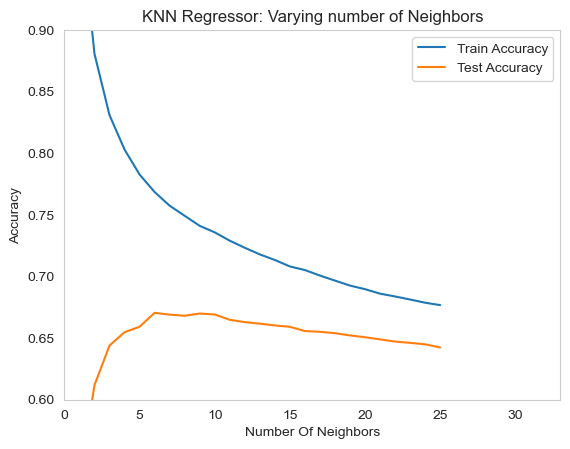

In [26]:
#Visualize train and test

# And then it looks like it's comparing?
plt.plot(nums, train_score.values(), label="Train Accuracy")
plt.plot(nums, test_score.values(), label="Test Accuracy")
plt.xlabel("Number Of Neighbors")
plt.ylabel("Accuracy")
plt.title("KNN Regressor: Varying number of Neighbors")
plt.legend()
plt.xlim(0, 33)
plt.ylim(0.60, 0.90)
plt.grid()
plt.show()

In [27]:
print(scores)

knn_val = max(scores)
best_knn = scores.index(knn_val) + 1
print(knn_val,best_knn)

[0.5342540762205845, 0.6117702948049837, 0.6439587072642349, 0.6547960352698204, 0.6592302404170417, 0.670532883971726, 0.6690570933829374, 0.6681628808304816, 0.6699439635627018, 0.6692101988707482, 0.664865510530522, 0.6630045428819028, 0.6617212155605552, 0.6602981943492183, 0.6592110949095471, 0.6557131847036777, 0.6551475125505057, 0.6539842166433054, 0.6522142464593847, 0.650717875109218, 0.6489872790475462, 0.6472042504136107, 0.6461751475153883, 0.6449664097386274, 0.6424222571842344]
0.670532883971726 6


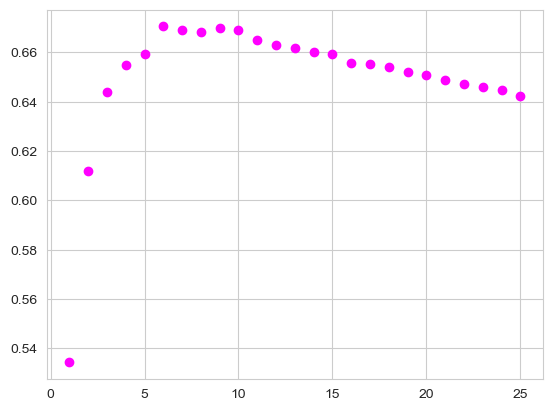

In [28]:
plt.scatter(nums, scores, color = 'magenta')

In [29]:
#Let's run the best model, It appears to be 7 typically
knn_best = KNeighborsRegressor(n_neighbors = 7)
knn_best.fit(X_train, y_train)
knn_best.score(X_test, y_test)

0.6690570933829374

In [30]:
y_pred = knn_best.predict(X_test)
print(mean_squared_error(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))

0.05400074587643276
0.16331037181996086


In [31]:
#now to run it on the validation set
knn_val = KNeighborsRegressor(n_neighbors = 7)
knn_val.fit(X_train, y_train)
score_knn = knn_val.score(X_val, y_val)
print(score_knn)


0.6619780000820126


In [32]:
y_predval = knn_val.predict(X_val)
print(mean_squared_error(y_val, y_predval))
print(mean_absolute_error(y_val, y_predval))

0.05456672742521666
0.16266457925636008


In [33]:
#to challenge ourselves let's try Linear SVM also
modelSVR = SVR(kernel='linear').fit(X_train, y_train)
y_pred = modelSVR.predict(X_test)

In [34]:
scoreLR = modelSVR.score(X_test, y_test)
print(type(scoreLR))

<class 'numpy.float64'>


In [35]:
y_pred = modelSVR.predict(X_test)
mean_squared_error(y_test, y_pred)

0.09998096709735836

In [36]:
y_pred = modelSVR.predict(X_test)
mean_absolute_error(y_test, y_pred)

0.24018580116908328

<BarContainer object of 2 artists>

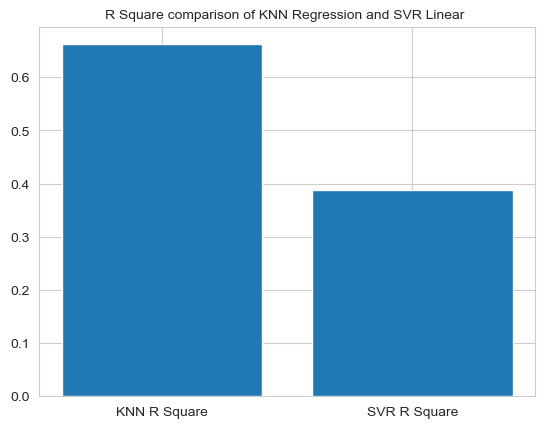

In [37]:
# R- Square evaluation of each KNN Regression and SVR Linear
score_groups = [score_knn, scoreLR]
score_names = ['KNN R Square', 'SVR R Square']
plt.title("R Square comparison of KNN Regression and SVR Linear ", size = 10)
#create bar plot by group
plt.bar(score_names, score_groups)

### My summary - In summary my best KNN neighbour for regression was 7 and I compared the R square of the validation set at the end with  the SVR Linear model for comparison  which showed that the KNN Regression was significantly better than SVR for this model.